In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, ElasticNet
from xgboost import XGBRegressor
from math import sqrt

### Load data:

In [2]:
cleaned = pd.read_csv('data/cleaned.csv', parse_dates = ['time'])
cleaned.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)

### fit LR model:

In [3]:
start_test_date = '2018-03-01'

In [4]:
numeric_columns = [col for col in cleaned.columns if col not in ['time', 'target', 'refID_coin']]

In [5]:
def mape_error(actual, forecasted):
    actual = pd.Series(actual)
    forecasted = pd.Series(forecasted)
    return 100 * sum(abs((actual - forecasted) / actual)) / actual.size

def ds_error(actual, forecasted):
    actual = pd.Series(actual)
    forecasted = pd.Series(forecasted)
    signs = (actual - actual.shift(1)) * (forecasted - forecasted.shift(1)) > 0
    print(signs.mean())
    return 100 * sum((actual - actual.shift(1)) * (forecasted - forecasted.shift(1)) > 0) / (actual.size - 1)

def mape_var_coeff(mape_errors):
    mape_errors = pd.Series(mape_errors)
    mean_mape_error = mape_errors.mean()
    return sqrt(sum((mape_errors - mean_mape_error)**2) / (mape_errors.size - 1)) / mean_mape_error

In [23]:
for coin in cleaned.refID_coin.unique():
    print(coin)
    train = cleaned[(cleaned.time <= start_test_date) & 
                             (cleaned.refID_coin == coin)].tail(-3)
    test  = cleaned[(cleaned.time > start_test_date) & 
                             (cleaned.refID_coin == coin)].head(-12)
    X_train = train[numeric_columns].values
    X_test = test[numeric_columns].values
    y_train = train.target.values - train.price.values
    y_test = test.target.values - test.price.values

    lr = ElasticNet(normalize=True)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test) + test.price.values
    y_pred_random_walk = test.price.values
    y_test = y_test + test.price.values
    
#     xgb = XGBRegressor()
#     xgb.fit(X_train, y_train)
#     y_pred = xgb.predict(X_test) + test.price.values
#     y_pred_random_walk = test.price.values
#     y_test = y_test + test.price.values
    
    print(mape_error(y_pred, y_test), mape_error(y_pred_random_walk, y_test))
    print(ds_error(y_pred, y_test), 50)

Bitcoin
0.013070947486163 0.013066761997740546
0.29990757855822553
29.995378215991373 50
Ethereum
0.019015188270222787 0.01897738551731397
0.29390018484288355
29.39454629486982 50
Ripple
0.132048352791469 0.13160491666959184
0.2720271102895872
27.20690186411955 50


(array([ 433.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6059.]),
 array([-8.94173707e-06, -8.94173707e-06, -8.94173707e-06, -8.94173707e-06,
        -8.94173707e-06, -8.94173707e-06, -8.94173707e-06, -8.94173707e-06,
        -8.94173707e-06, -8.94173707e-06, -8.94173

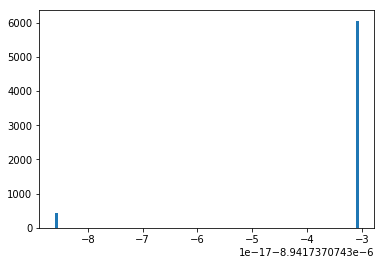

In [25]:
plt.hist((y_pred - y_pred_random_walk), bins=100)

In [ ]:
lr.coef_

In [10]:
list(zip(lr.coef_, numeric_columns))

[(-0.3149041795662705, 'price'),
 (-0.022733798388935075, 'marketCap'),
 (-2.365545737626227, 'CirculatingSupply'),
 (-8.466764458734885e-05, 'Volume24h'),
 (0.00016087191608439577, 'Movement1h'),
 (-3.5635205099734946e-06, 'Movement24h'),
 (2.865534642948366, 'percent_market_cap'),
 (-0.01061072103415625, 'market_entropy'),
 (0.04750293919570042, 'total_market_cap'),
 (1.9734148633244923, 'price_MA_2'),
 (-6.1372389432482715, 'price_MA_4'),
 (22.74572455713342, 'price_MA_8'),
 (-57.62940901332559, 'price_MA_12'),
 (63.157790866461134, 'price_MA_16'),
 (-37.418264073599836, 'price_MA_24'),
 (21.1811021162237, 'price_MA_36'),
 (-8.499686018976593, 'price_MA_48'),
 (0.8984999601910295, 'price_MA_72'),
 (-0.018549154791938305, 'price_MA_144'),
 (0.015701489717999673, 'price_MA_288'),
 (-0.02369550602773507, 'price_MA_1440'),
 (10.21354836150267, 'CirculatingSupply_MA_2'),
 (-27.846259194161846, 'CirculatingSupply_MA_4'),
 (13.670672931904283, 'CirculatingSupply_MA_8'),
 (171.0234933926409